# Finch Carr - Lab 07
## Event Selection Optimization
- I am supposed to pick either high or low pT samples, and in that sample, there are dedicated training samples for event selection optimization. 
### Problem 1
- I want to make a stacked histogram plot for the mass variable of my data and then compare $\frac{N_{higgs}}{\sqrt{N_{QCD}}}$ ***without event selection***
  - If the factors above are equivalent, I want to then explain why they are equivalent

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle as pk
import h5py
%matplotlib inline

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
pickle_higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
higgs = pk.load(pickle_higgs)
print(higgs.ndim, higgs.size)
higgs

2 1400000


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [3]:
pickle_qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
qcd = pk.load(pickle_qcd)
print(qcd.ndim, qcd.size)
qcd

2 1400000


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


#### Variables
- Each dataset (Higgs and QCD) have 14 features: $p_T$, $\eta$ (eta), $\phi$ (phi), 'mass', $e_2$, $e_3$, $D_2$, 'angularity', $\tau_1$, $\tau_2$, $\tau_3$, $\tau_{21}$, $\tau_{32}$, $Kt\Delta R$
- $p_T$ - Transverse Momentum
   - According to the papers provided, all simulated datapoints require a minimum $p_T$ value of 250 GeV to be counted as a possible signal; our entire QCD and Higgs sets of points have minimum $p_T$ measurements of this value or greater
- $\eta$ (eta) - Psudorapidity
  - For true Higgs boson detections, the papers describe that when the minimum $p_T$ value is set to 250 GeV, the maximum value for $\left|\eta\right|$ is less than or equal to 2.0
- $\phi$ (phi) - Azimuthal Angle
- mass - Transverse Invariant Mass
- Energy Corelation Functions (ECF)
  - $e_2$ **-   2-point ECF**
  - $e_3$ **-   3-point ECF**
  - $D_2$ **-   ratio of ee2 and ee3** 
- Angularity
- $\tau_1$, $\tau_2$, $\tau_3$, $\tau_{21}$, $\tau_{32}$ are N-subjettyness
- $Kt\Delta R$ is the $\Delta R$ value of two subjets within the large-R jet

In [4]:
#Define Higgs variables
hMass = higgs['mass']
hPt = higgs['pt']
hEta = higgs['eta']
hPhi = higgs['phi']
hEe2 = higgs['ee2']
hEe3 = higgs['ee3']
hD2 = higgs['d2']
hAngularity = higgs['angularity']
hT1 = higgs['t1']
hT2 = higgs['t2']
hT3 = higgs['t3']
hT21 = higgs['t21']
hT32 = higgs['t32']
hKtDeltaR = higgs['KtDeltaR']

# Do the same for QCD background
qMass = qcd['mass']
qPt = qcd['pt']
qEta = qcd['eta']
qPhi = qcd['phi']
qEe2 = qcd['ee2']
qEe3 = qcd['ee3']
qD2 = qcd['d2']
qAngularity = qcd['angularity']
qT1 = qcd['t1']
qT2 = qcd['t2']
qT3 = qcd['t3']
qT21 = qcd['t21']
qT32 = qcd['t32']
qKtDeltaR = qcd['KtDeltaR']

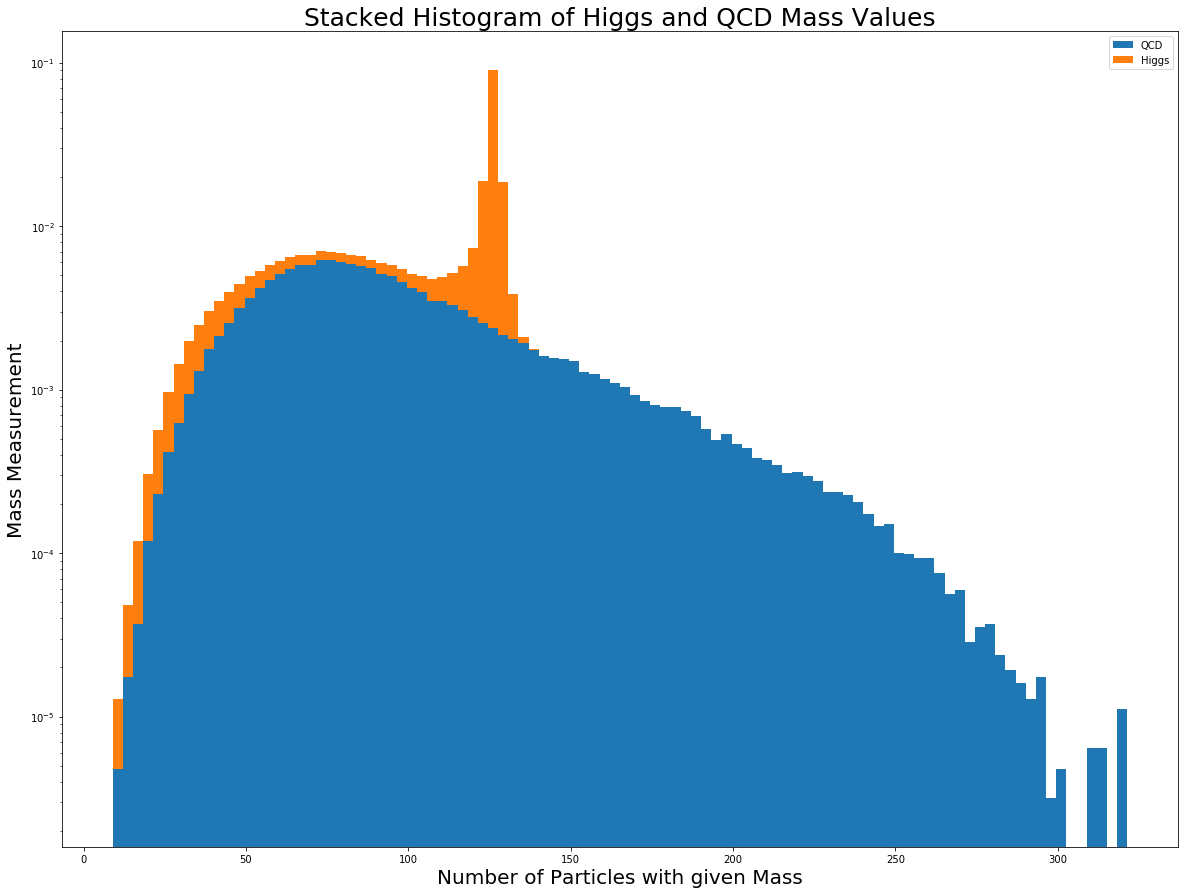

In [5]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')
n_bins = 100
ax.hist((qMass, hMass), bins=n_bins, density=True, histtype='bar', stacked=True, label=('QCD', 'Higgs'))
ax.set_title('Stacked Histogram of Higgs and QCD Mass Values',size=25)
ax.set_xlabel('Number of Particles with given Mass', size=20)
ax.set_ylabel('Mass Measurement', size=20)
ax.legend(loc='best')
plt.show()

In [6]:
Nhiggs = 100
Nqcd = 20000
Nhiggs / np.sqrt(Nqcd)

0.7071067811865475

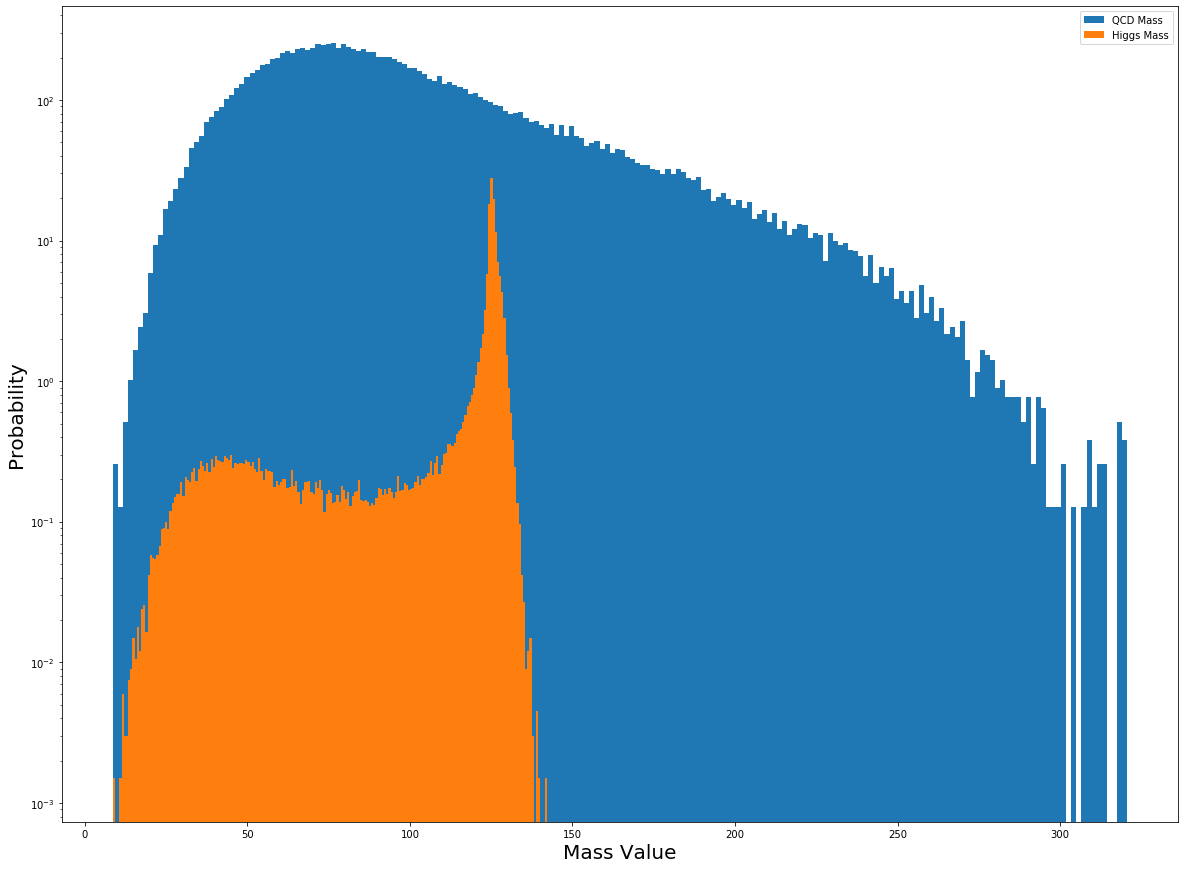

In [33]:
n_bins = 100
n_higgs = 100
n_qcd = 20000

#qcd data 
hist_qcd, bins_q = np.histogram(qMass, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMass, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

plt.xlabel('Mass Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend()
plt.show()

In [8]:
print(sum(hist_qcd * widths_qcd))
print(sum(hist_higgs * widths_higgs))

20000.000000000025
100.00000000000001


- Above, we see the normalized distributions by expected particle yield such that the area under both the Higgs and Background mass distributions are equal to the expected yields of particles, but on a log-scaled y-axis. 
  - The Higgs area is equal to 100 for an expected yield of 100 particles
  - The Background area is equal to 20000 for an expected yield of 20000 particles

In [9]:
# Basic Significance (No Cuts)
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5 = stats.poisson.ppf(sigma5, mu=np.mean(qMass))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5h = stats.poisson.ppf(sigma5, mu=np.mean(hMass))
print(f'{low5}=QCD low, {low5h}=Higgs low, {low5h / low5}=Low Ratio')
high5 = stats.poisson.ppf(1-sigma5, mu=np.mean(qMass))
high5h = stats.poisson.ppf(1-sigma5, mu=np.mean(hMass))
print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 53.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
53.0=QCD low, 65.0=Higgs low, 1.2264150943396226=Low Ratio
151.0=QCD high, 172.0=Higgs high, 1.1390728476821192=High Ratio


### Problem 2
- I now want to identify mass cuts to optimize the expected significance
- Mass cuts could theoretically be made such that we only measure particles within a certain mass window, making it more likely that a detection is a Higgs detection. This means we want masses of particles where it is more likely that they are Higgs particle detections than QCD background detections
- Another way to look at it using our simulated data is we want as few of the 100000 background datapoints left and as many of the 100000 Higgs datapoints left as possible after choosing a given mass cut / mass window

In [10]:
# Cut B: Tight Mass Window -- Only particles falling within one standard deviation of Mean Higgs Sample Mass Value
hMassB = []
qMassB = []
hMean = np.mean(hMass)
hStd = np.std(hMass) 
hMIN = hMean - hStd
hMAX = hMean + hStd
for i in range(len(hMass)):
    if hMass[i] < hMAX and hMass[i] > hMIN:
        hMassB.append(hMass[i])
    if qMass[i] < hMAX and qMass[i] > hMIN:
        qMassB.append(qMass[i])
len(hMassB), len(qMassB)

(86710, 33133)

- On page 12 of ***Eur. Phys. J. C 79 (2019) 836*** linked in the provided HTML file, the authors discuss that a *tight mass window* was identified that contained 68% of the Higgs particles for any given dataset, so by setting the upper and lower bounds of my mass window to be 1 standard deviation above and below the mean Higgs mass value, I created my own tight mass window, which actuall contains more than 68% of the simulated Higgs data. 
  - As seen above, it contains roughly 86000 of the original 100000 simulated datapoints. 
  - After further experimenting with the values of upper and lower mass value bounds, the mass cut that returned the best significance values is found below

In [27]:
# Cut C: Tighter Mass Window
hMassC = []
qMassC = []

hMIN = np.min(hMass)
hMAX = np.max(hMass)
for i in range(len(hMass)):
    if hMass[i] < hMAX and hMass[i] > hMIN:
        hMassC.append(hMass[i])
    if qMass[i] < hMAX and qMass[i] > hMIN:
        qMassC.append(qMass[i])
len(hMassC), len(qMassC)

(99998, 85387)

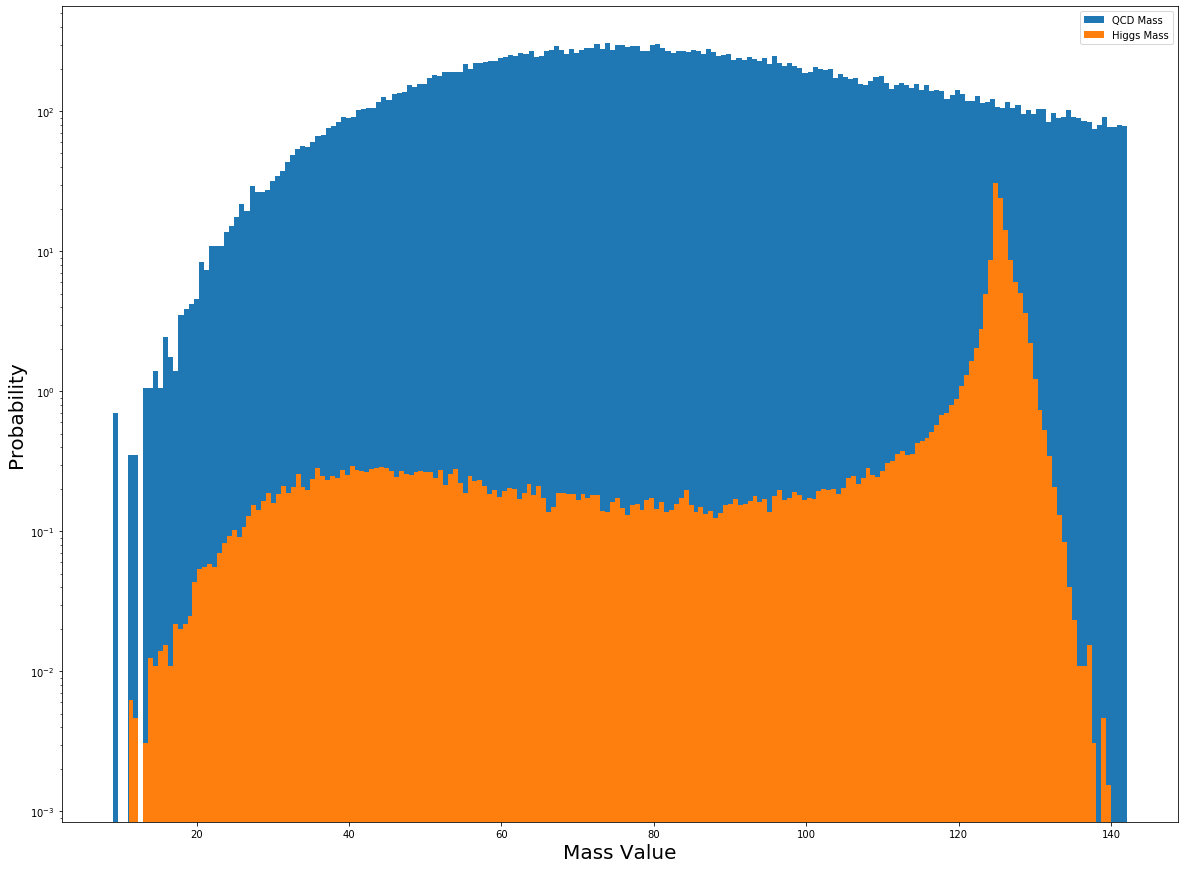

20000.000000000004
100.0


In [32]:
# Plotting Mass Cut C
hist_qcd, bins_q = np.histogram(qMassC, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMassC, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

plt.xlabel('Mass Value', size=20)
plt.ylabel('Probability', size=20)
plt.yscale('log')
plt.legend()
plt.show()
print(sum(hist_qcd * widths_qcd))
print(sum(hist_higgs * widths_higgs))

In [29]:
Nhiggs = 100
Nqcd = 20000
Nhiggs / np.sqrt(Nqcd)
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5C = stats.poisson.ppf(sigma5, mu=np.mean(qMassC))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5C} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5hC = stats.poisson.ppf(sigma5, mu=np.mean(hMassC))
print(f'{low5C}=QCD low, {low5hC}=Higgs low, {low5hC / low5C}=Low Ratio')

high5C = stats.poisson.ppf(1-sigma5, mu=np.mean(qMassC))
high5hC = stats.poisson.ppf(1-sigma5, mu=np.mean(hMassC))
print(f'{high5C}=QCD high, {high5hC}=Higgs high, {high5hC / high5C}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 42.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
42.0=QCD low, 66.0=Higgs low, 1.5714285714285714=Low Ratio
133.0=QCD high, 172.0=Higgs high, 1.2932330827067668=High Ratio


### Problem 3A
- Now I want to identify Tau2 cuts that would increase my significance values just like I did with mass cuts

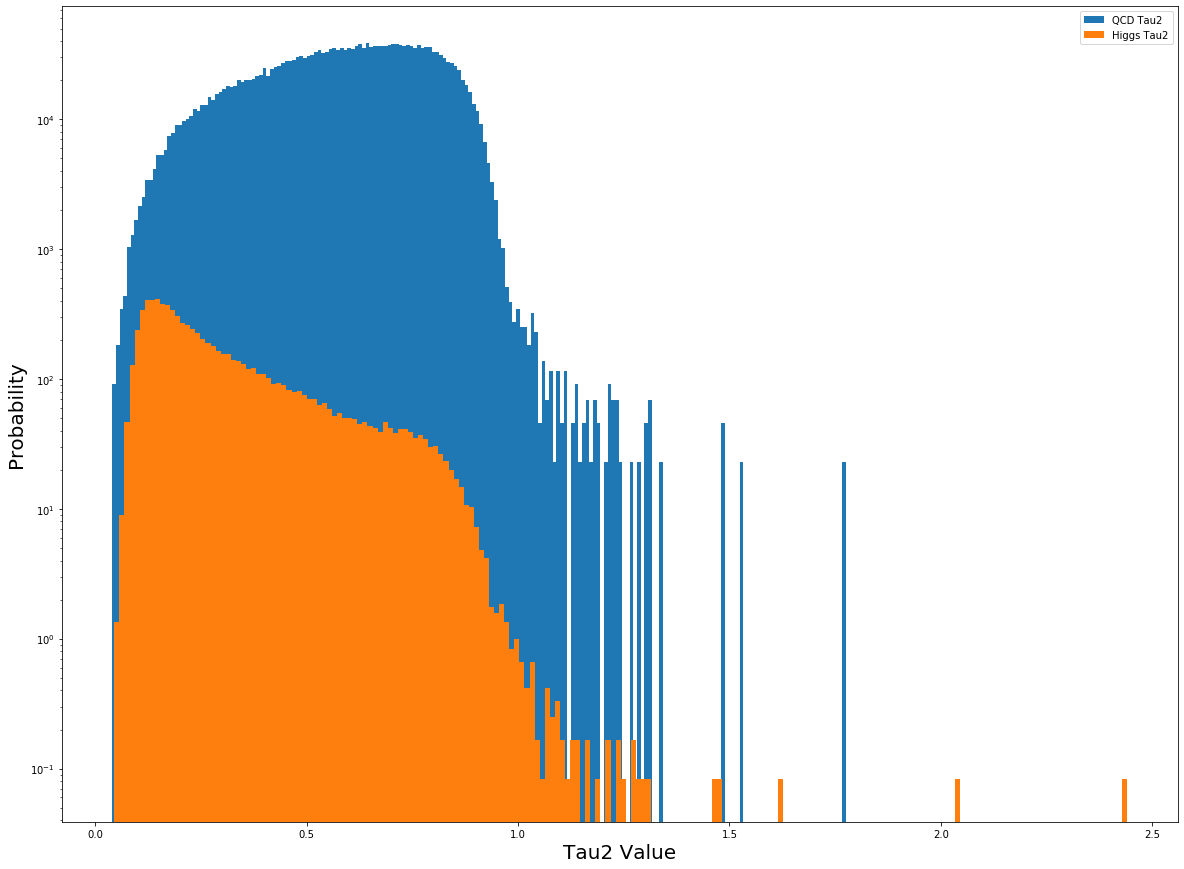

In [93]:
n_bins = 100
n_higgs = 100
n_qcd = 20000

#qcd data 
hist_qcd, bins_q = np.histogram(qT2, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Tau2')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hT2, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Tau2")

plt.xlabel('Tau2 Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend()
plt.show()

In [64]:
print(sum(hist_qcd * widths_qcd))
print(sum(hist_higgs * widths_higgs))

20000.00000000001
100.00000000000003


In [94]:
# Basic Ee2 Significance (No Cuts)
sigma5 = stats.norm.sf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5e = stats.gamma.ppf(sigma5, a=np.mean(qT2))
print(f'The detection value on the x-axis would need to be less than or equal to a Tau2 value of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5he = stats.gamma.ppf(sigma5, a=np.mean(hT2))
print(f'{low5}=QCD low, {low5h}=Higgs low, {low5he / low5e}=Low Ratio')
high5 = stats.gamma.ppf(1-sigma5, a=np.mean(qT2))
high5h = stats.gamma.ppf(1-sigma5, a=np.mean(hT2))
print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a Tau2 value of 0.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
0.0=QCD low, 0.0=Higgs low, 7.786896960239908e-11=Low Ratio
13.555728846331442=QCD high, 12.223570190208871=Higgs high, 0.9017272570716041=High Ratio


In [96]:
# Ee2 Cut A: hEe2 min to max
hT2A = []
qT2A = []

hMIN = np.min(hT2)
hMAX = 1.0
for i in range(len(hT2)):
    if hT2[i] < hMAX and hT2[i] > hMIN:
        hT2A.append(hT2[i])
    if qT2[i] < hMAX and qT2[i] > hMIN:
        qT2A.append(qT2[i])
len(hT2A), len(qT2A)

(99929, 99857)

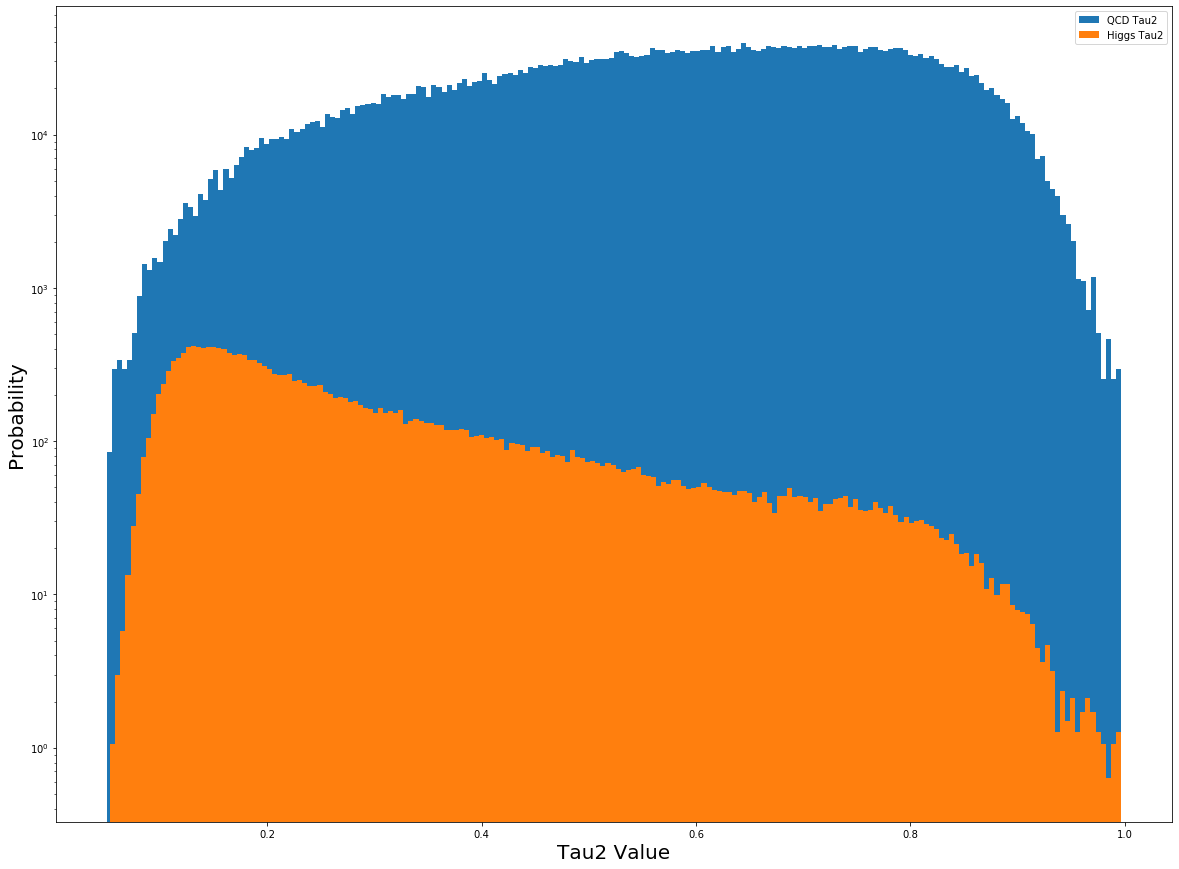

In [97]:
# Plotting pT Cut A
#qcd data 
hist_qcd, bins_q = np.histogram(qT2A, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Tau2')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hT2A, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Tau2")

plt.xlabel('Tau2 Value', size=20)
plt.ylabel('Probability', size=20)
plt.legend()
plt.show()

In [98]:
# Tau2 Cut A Significance Calculations
sigma5 = stats.norm.sf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5e = stats.gamma.ppf(sigma5, a=np.mean(qT2A))
print(f'The detection value on the x-axis would need to be less than or equal to a Ee2 value of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5he = stats.gamma.ppf(sigma5, a=np.mean(hT2A))
print(f'{low5}=QCD low, {low5h}=Higgs low, {low5he / low5e}=Low Ratio')
high5 = stats.gamma.ppf(1-sigma5, a=np.mean(qT2A))
high5h = stats.gamma.ppf(1-sigma5, a=np.mean(hT2A))
print(f'{high5}=QCD high, {high5h}=Higgs high, {high5h / high5}=High Ratio')

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a Ee2 value of 0.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
0.0=QCD low, 0.0=Higgs low, 7.327224207945296e-11=Low Ratio
13.552816512789976=QCD high, 12.22027950778308=Higgs high, 0.901678222843985=High Ratio


- I could not identify another variable besides mass that was as discriminative as the mass variable (i.e. that had equal or better significance after a feature cut)